# Kartpathy's makemore tutorial
[youtube](https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvK)

I started this in Google Colab, but that is so sandboxed that some things - both OS and Python - don't work the same way as in a local environment. This was somewhat debilitating, so I switched to VS Code. 

In [110]:
!pwd
words = open('names.txt', 'r').read().splitlines()

/Users/andy/repo/other/makemore


In [111]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [112]:
len(words)

32033

In [113]:
min(len(w) for w in words)

2

In [114]:
max(len(w) for w in words)

15

In [115]:
for w in words[:1]:
  for ch1 in zip(w, w[1:]):
    print(ch1)

('e', 'm')
('m', 'm')
('m', 'a')


In [116]:
for w in words[:3]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs,chs[1:]):
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [117]:
b = {}
for w in words[:3]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs,chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [118]:
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [119]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs,chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1


In [120]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [121]:
import torch

In [122]:
a = torch.zeros((3, 5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [123]:
a[1, 3]  += 1
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [124]:
N = torch.zeros((27, 27), dtype=torch.int32)


In [125]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [126]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs,chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


In [127]:
itos = {i:s for s, i in stoi.items()}
stoi.items()
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

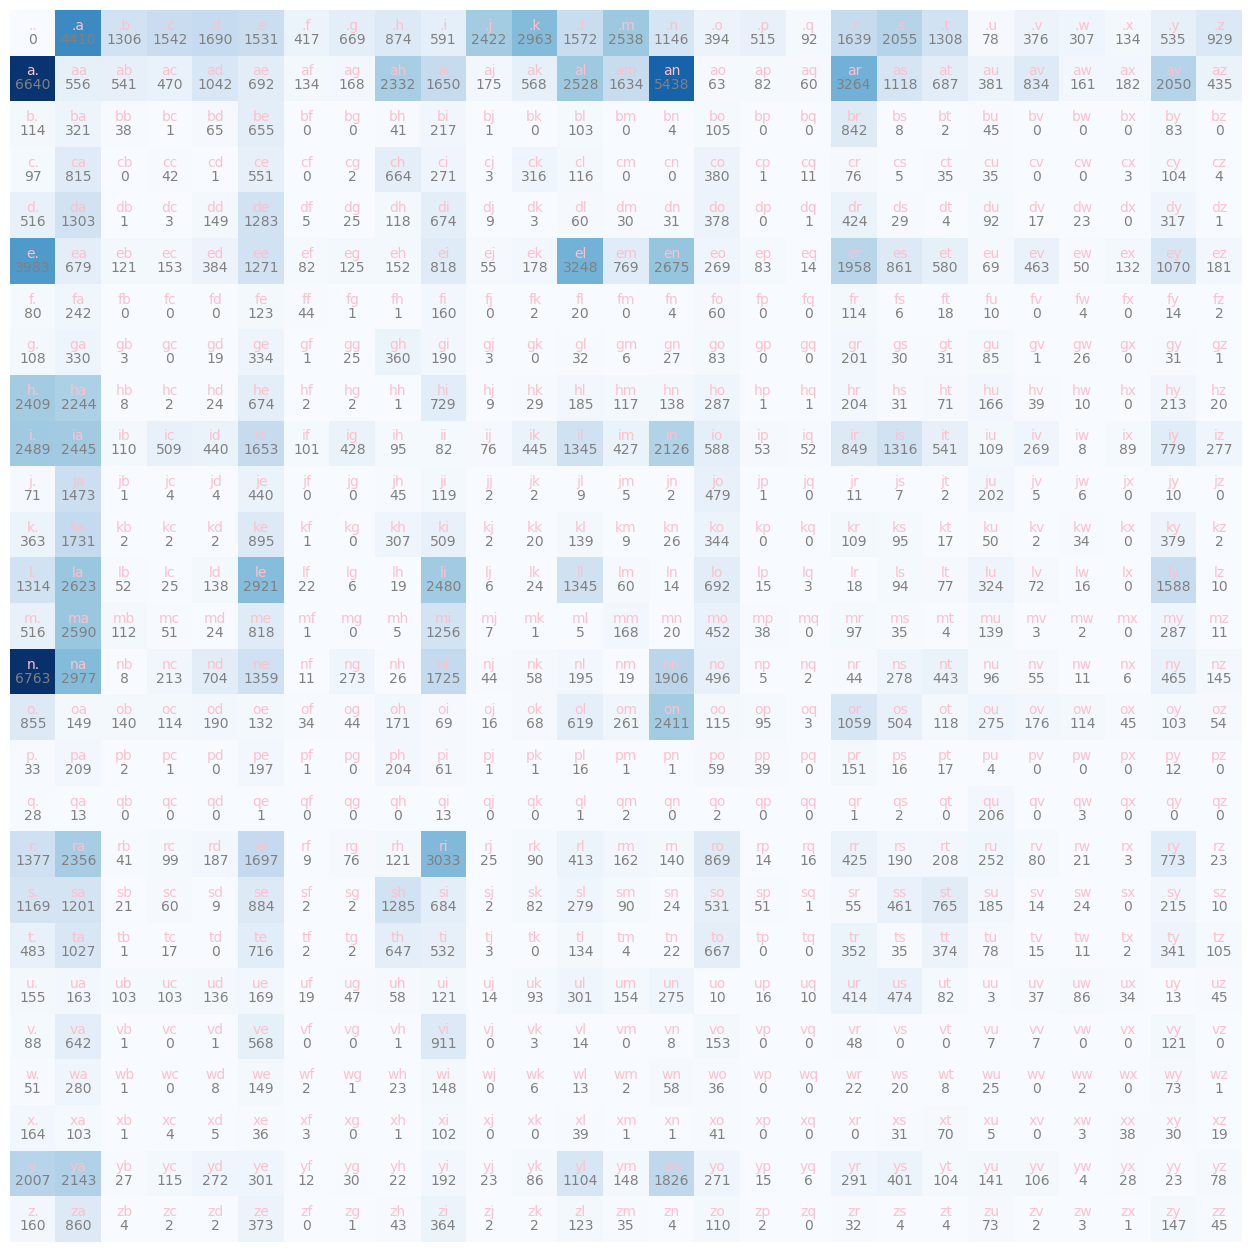

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center",va="bottom", color="pink")
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');


In [129]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [130]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [131]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

Note: One should look at broadcasting rules in PyTorch to understand which types of tensor manipulation are allowed.
In the following case `keepdim=True` is essential.

Note2: ` P /= P.sum` means operate in place, while `P = P / P.sum` will produce a new tensor (weird...). The latter still works fine, but the former is more efficient.

In [134]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [135]:
for i in range(5):
    out = []
    ix = 0
    while True:
        p  = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

sonde.
janasah.
p.
cony.
a.


In [138]:
# create training set of bigrams (x, y) for NN
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [139]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [143]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

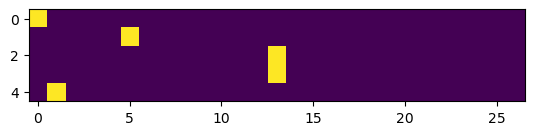

In [144]:
plt.imshow(xenc)

`@` is a matrix multiplication in PyTorch 

In [147]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-0.1734,  0.6722, -0.0909, -0.9144,  1.4443,  0.4805, -0.4379, -0.1279,
         -1.5892,  0.4896,  0.0959, -1.3972,  0.0541,  0.2962, -0.8061, -1.2626,
          1.8570,  0.3901,  0.7865,  0.1413, -2.2509,  0.6196, -1.1654, -1.6006,
         -0.3698,  0.5165,  0.8132],
        [ 1.1214,  0.0411, -2.8280, -0.0657,  0.2397,  0.5139,  0.4188,  0.0637,
         -1.6669, -0.5582,  1.0677, -0.9528,  1.0092, -0.1674,  0.6714,  0.2656,
         -1.5040, -0.6947,  0.0226, -0.5021,  0.9128, -0.7906,  2.0830,  0.3807,
         -1.2468, -2.5217,  1.3755],
        [-1.0383,  1.0685, -2.0425, -0.0629, -0.2920,  0.8046, -1.3839,  0.5184,
          0.6482,  2.0258,  0.6641,  1.0211,  0.9540,  0.8579, -0.0628,  0.5724,
         -0.5031,  0.3026,  0.8160, -0.0247,  0.4519,  0.8577, -0.1979,  1.4293,
          1.6224,  1.0978,  2.4836],
        [-1.0383,  1.0685, -2.0425, -0.0629, -0.2920,  0.8046, -1.3839,  0.5184,
          0.6482,  2.0258,  0.6641,  1.0211,  0.9540,  0.8579, -0.0628,  0.5724

The weights are interpreted as log counts. 

In [153]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True) # Normalize to probs
probs

tensor([[0.0233, 0.0542, 0.0253, 0.0111, 0.1173, 0.0447, 0.0179, 0.0244, 0.0056,
         0.0452, 0.0305, 0.0068, 0.0292, 0.0372, 0.0124, 0.0078, 0.1772, 0.0409,
         0.0608, 0.0319, 0.0029, 0.0514, 0.0086, 0.0056, 0.0191, 0.0464, 0.0624],
        [0.0755, 0.0256, 0.0015, 0.0230, 0.0313, 0.0411, 0.0374, 0.0262, 0.0046,
         0.0141, 0.0715, 0.0095, 0.0675, 0.0208, 0.0481, 0.0321, 0.0055, 0.0123,
         0.0252, 0.0149, 0.0613, 0.0112, 0.1975, 0.0360, 0.0071, 0.0020, 0.0973],
        [0.0054, 0.0446, 0.0020, 0.0144, 0.0114, 0.0342, 0.0038, 0.0257, 0.0293,
         0.1161, 0.0298, 0.0425, 0.0398, 0.0361, 0.0144, 0.0271, 0.0093, 0.0207,
         0.0346, 0.0149, 0.0241, 0.0361, 0.0126, 0.0640, 0.0776, 0.0459, 0.1835],
        [0.0054, 0.0446, 0.0020, 0.0144, 0.0114, 0.0342, 0.0038, 0.0257, 0.0293,
         0.1161, 0.0298, 0.0425, 0.0398, 0.0361, 0.0144, 0.0271, 0.0093, 0.0207,
         0.0346, 0.0149, 0.0241, 0.0361, 0.0126, 0.0640, 0.0776, 0.0459, 0.1835],
        [0.0047, 0.0310,

In [154]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [167]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [168]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts (forward pass of NN)
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# Last two lines above are an exponential ratio rule
loss = -probs[torch.arange(5), ys].log().mean() # vectorized calculation of loss

Note how everything above is a _differentiable_ operation.

In [169]:
# backward pass
W.grad = None # more efficient way of setting to zero
loss.backward()

In [171]:
# update
W.data += -0.1 * W.grad

In [161]:
prob.shape

torch.Size([5, 27])

In [162]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print("--------")
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = - logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print("========")
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the correct character: 0.01805

In [166]:
# Calculating the -ve mean log loss
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7693)